# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [434]:
m = 2
A = 0.01#0.001#0.049261572870865834#0.0495#0.04922733211517334#0.04926157287086606#0.049261573076248164#0.04925#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

Choose your grid

In [435]:
global loggrid=true
global bisection=false
global meshrefinement=false;

In [436]:
using Quadmath, Printf

res=m;
N=2.0^m*400.0/2.0
Xf=1.0#Float128(1.0);

dx=Xf/N#Float128(Xf/N);
dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
Nt=2.0^m*400.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [437]:
print(N)

800.0

In [438]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [439]:
using Printf
include("./ScalarField.jl");
#include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [440]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
    #global dergrid_func = der_grid(initX)
    global jacobian_func = Spline1D(originalX[4:L-3], analytic_jacobian(originalX[4:L-3]),  k=4);
end;

step size is  0.00125
the time step is 0.000625


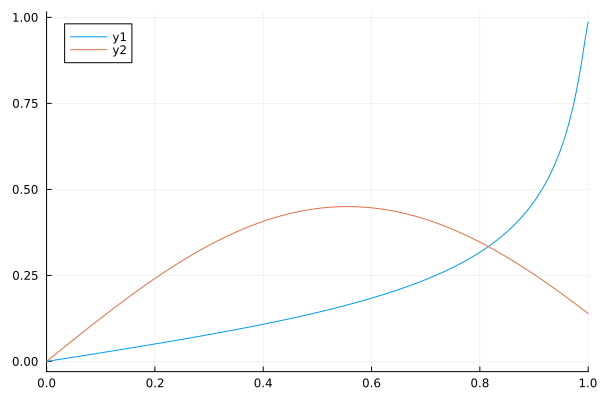

In [441]:
using Plots
plot([originalX[4:L-3] originalX[4:L-3]], [initX[4:L-3] analytic_jacobian(originalX[4:L-3])],xlim=[0,1])

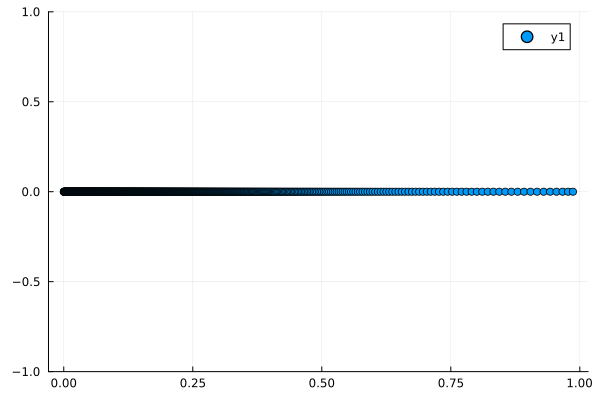

In [442]:
scatter(initX[4:L-3], zeros(length(initX))[4:L-3], ylim=[-1,1])

In [443]:
initX

807-element Vector{Float64}:
 -0.00375
 -0.0025
 -0.00125
  0.0
  0.0003109493524428182
  0.0006219000879049649
  0.0009328535894365136
  0.0012438112401490296
  0.0015547744232463198
  0.0018657445220551876
  0.0021767229200561934
  0.002487711000914423
  0.00279871014851027
  ⋮
  0.8919387227363832
  0.9045047125655983
  0.91719241344502
  0.9299053104890003
  0.9425061889349308
  0.9548017144770801
  0.966521739326157
  0.9772933187942637
  0.9866142981514302
  1.00125
  1.0025
  1.00375

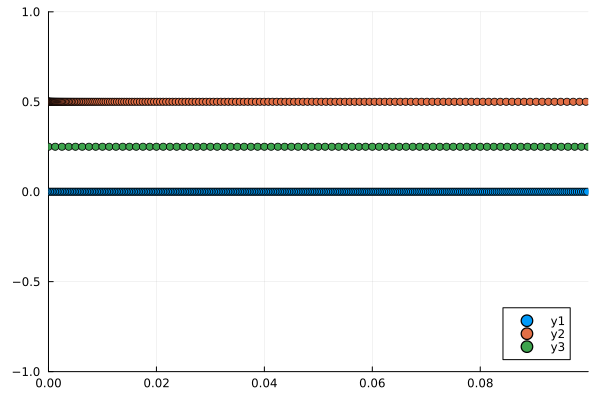

In [444]:
aux=chebyshev(N)
scatter([initX[4:L-3], aux, originalX], [zeros(length(initX))[4:L-3], zeros(length(aux)).+0.5, zeros(length(originalX)).+0.25],ylim=[-1,1],xlim=[0,0.1])

# Initial data of m β Ψ and Ψ,x

In [445]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#Float128(0.7)#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3#Float128(0.3)

#PSI
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [446]:
#derpsi_func(state_array[:,5]); #doesnt output the quad precision
#coef=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5]);

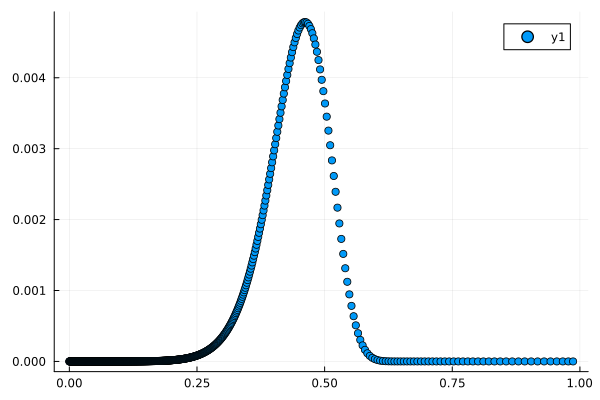

In [447]:
scatter(initX[4:L-3], init_gaussian(initX[4:L-3],r0,sigma,A))

In [448]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [449]:
y0=Float128.([0.0 0.0 0.0])
#state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:],coef);

state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

In [450]:
originalX[100]
initX[100]

0.030057162148019474

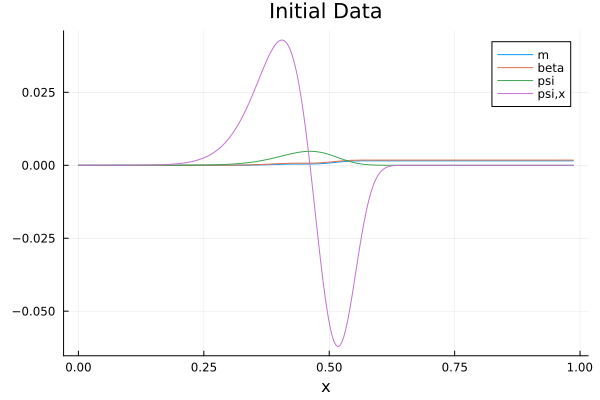

In [451]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [452]:
using CSV, Tables
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "derpsi"]

print_muninn(files, 0, state_array[:,1:5],res,"w")

In [453]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [454]:
ginit=speed(initX,state_array[:,1],state_array[:,2],dx)
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

[0.4996890989923071, 0.49937829329195466, 0.49906758151847314, 0.49875696229305144, 0.4984464342385071, 0.4981359959792556, 0.49782564614127917, 0.4975153833520977, 0.4972052062407375, 0.49689511343770165, 0.4965851035749396, 0.4962751752858171, 0.4959653272050859, 0.49565555796885463, 0.4953458662145576, 0.4950362505809265, 0.4947267097079589, 0.4944172422368902, 0.4941078468101625, 0.49379852207139585, 0.4934892666653582, 0.4931800792379361, 0.4928709584361051, 0.4925619029079002, 0.49225291130238696, 0.49194398226963093, 0.4916351144606696, 0.49132630652748277, 0.49101755712296274, 0.49070886490088517, 0.49040022851588094, 0.4900916466234057, 0.4897831178797111, 0.4894746409418165, 0.48916621446747854, 0.48885783711516334, 0.4885495075440165, 0.4882412244138348, 0.48793298638503707, 0.4876247921186347, 0.4873166402762038, 0.48700852951985496, 0.4867004585122053, 0.4863924259163497, 0.48608443039583066, 0.48577647061461116, 0.48546854523704436, 0.4851606529278456, 0.4848527923520635,

 0.321724296008333, 0.32121878921436964, 0.3207118627887737, 0.32020350649872065, 0.3196937100156205, 0.3191824629139291, 0.31866975466993913, 0.3181555746605538, 0.3176399121620419, 0.31712275634877457, 0.31660409629194053, 0.3160839209582452, 0.3155622192085871, 0.3150389797967154, 0.3145141913678662, 0.3139878424573782, 0.3134599214892873, 0.312930416774898, 0.31239931651133496, 0.3118666087800692, 0.31133228154542414, 0.3107963226530565, 0.3102587198284134, 0.30971946067516615, 0.30917853267361856, 0.3086359231790909, 0.3080916194202771, 0.30754560849757656, 0.30699787738140005, 0.3064484129104469, 0.3058972017899564, 0.3053442305899297, 0.3047894857433241, 0.30423295354421775, 0.3036746201459448, 0.3031144715592003, 0.30255249365011405, 0.30198867213829383, 0.3014229925948356, 0.300855440440302, 0.30028600094266744, 0.29971465921522883, 0.29914140021448254, 0.29856620873796635, 0.2979890694220642, 0.29740996673977654, 0.29682888499845217, 0.29624580833748193, 0.295660720725955, 0.

[1263.0058975543157, 631.1089955161636, 420.47625988260313, 315.15956569649677, 251.9692879659244, 209.84221835983712, 179.75126759314708, 157.18289102299963, 139.62956384753025, 125.58677118536795, 114.0970944754078, 104.52225467668643, 96.42036629908806, 89.47579684947469, 83.45708249936206, 78.19062537721275, 73.54367416933093, 69.41297785379673, 65.71702246578921, 62.39059683330848, 59.38091095983487, 56.64477302990202, 54.14650284799905, 51.85636691774454, 49.74938910205878, 47.80443574637528, 46.00350410780516, 44.33116326376493, 42.77411069468062, 41.32081755015308, 39.96124257328482, 38.68659966419415, 37.48916770470854, 36.36213394340733, 35.29946422894295, 34.29579487114105, 33.34634203813797, 32.44682545923475, 31.59340386577328, 30.78262011588044, 30.011354349737395, 29.27678383695382, 28.576348426634393, 27.90772070879918, 27.268780154281004, 26.6575906276805, 26.072380771007808, 25.51152683936842, 24.973537638401694, 24.457041269227407, 23.960773432810264, 23.483567083820

 0.2681433054259091, 0.26403151323228513, 0.25991636068913887, 0.2557976222352252, 0.25167505976696775, 0.24754842341395356, 0.24341745268362147, 0.2392818779028419, 0.23514142185017195, 0.23099580144655327, 0.22684472935910385, 0.22268791537633614, 0.2185250674352986, 0.21435589222044302, 0.2101800953057655, 0.20599738086819902, 0.2018074510520699, 0.19761000510256863, 0.19340473840433703, 0.18919134155747955, 0.18496949960086626, 0.18073889145909047, 0.17649918965452235, 0.17225006029841872, 0.1679911633604666, 0.16372215321568467, 0.15944267947869123, 0.155152388153816, 0.15085092315143403, 0.14653792824420922, 0.14221304956152594, 0.13787593874772242, 0.13352625694197368, 0.12916367977728443, 0.12478790364572934, 0.12039865353999428, 0.11599569286132386, 0.11157883568626109, 0.10714796211567977, 0.1027030374983429, 0.09824413653911314, 0.093771473584353, 0.08928544074432221, 0.08478665599161628, 0.0802760240018239, 0.07575481332530168, 0.07122475456011232, 0.06668816561773229, 0.06

[0.4996890989923071, 0.49937829329195466, 0.49906758151847314, 0.49875696229305144, 0.4984464342385071, 0.4981359959792556, 0.49782564614127917, 0.4975153833520977, 0.4972052062407375, 0.49689511343770165, 0.4965851035749396, 0.4962751752858171, 0.4959653272050859, 0.49565555796885463, 0.4953458662145576, 0.4950362505809265, 0.4947267097079589, 0.4944172422368902, 0.4941078468101625, 0.49379852207139585, 0.4934892666653582, 0.4931800792379361, 0.4928709584361051, 0.4925619029079002, 0.49225291130238696, 0.49194398226963093, 0.4916351144606696, 0.49132630652748277, 0.49101755712296274, 0.49070886490088517, 0.49040022851588094, 0.4900916466234057, 0.4897831178797111, 0.4894746409418165, 0.48916621446747854, 0.48885783711516334, 0.4885495075440165, 0.4882412244138348, 0.48793298638503707, 0.4876247921186347, 0.4873166402762038, 0.48700852951985496, 0.4867004585122053, 0.4863924259163497, 0.48608443039583066, 0.48577647061461116, 0.48546854523704436, 0.4851606529278456, 0.4848527923520635,

[1263.0058975543157, 631.1089955161636, 420.47625988260313, 315.15956569649677, 251.9692879659244, 209.84221835983712, 179.75126759314708, 157.18289102299963, 139.62956384753025, 125.58677118536795, 114.0970944754078, 104.52225467668643, 96.42036629908806, 89.47579684947469, 83.45708249936206, 78.19062537721275, 73.54367416933093, 69.41297785379673, 65.71702246578921, 62.39059683330848, 59.38091095983487, 56.64477302990202, 54.14650284799905, 51.85636691774454, 49.74938910205878, 47.80443574637528, 46.00350410780516, 44.33116326376493, 42.77411069468062, 41.32081755015308, 39.96124257328482, 38.68659966419415, 37.48916770470854, 36.36213394340733, 35.29946422894295, 34.29579487114105, 33.34634203813797, 32.44682545923475, 31.59340386577328, 30.78262011588044, 30.011354349737395, 29.27678383695382, 28.576348426634393, 27.90772070879918, 27.268780154281004, 26.6575906276805, 26.072380771007808, 25.51152683936842, 24.973537638401694, 24.457041269227407, 23.960773432810264, 23.483567083820

 0.5473224002772586, 0.54313992111443, 0.5389617298277501, 0.5347877499207704, 0.5306179044718925, 0.5264521161084894, 0.5222903069794942, 0.5181323987263602, 0.5139783124522975, 0.5098279686897222, 0.5056812873658078, 0.5015381877660884, 0.49739858849603746, 0.49326240744057354, 0.4891295617214546, 0.4849999676525573, 0.4808735406930373, 0.47675019539842184, 0.4726298453697197, 0.4685124032006622, 0.46439778042325436, 0.46028588745187904, 0.45617663352624915, 0.4520699266535984, 0.44796567355057537, 0.44386377958540807, 0.43976414872101904, 0.4356666834598687, 0.4315712847914468, 0.4274778521434461, 0.423386283337787, 0.4192964745527939, 0.41520832029295157, 0.4111217133677667, 0.4070365448813767, 0.4029527042345935, 0.3988700791411036, 0.39478855565950927, 0.3907080182428102, 0.386628349806729, 0.3825494318180054, 0.37847114440337287, 0.3743933664793708, 0.3703159759024372, 0.3662388496378252, 0.3621618639447966, 0.3580848945742557, 0.3540078169735109, 0.34993050649117174, 0.34585283

In [455]:
using Base.Threads
Threads.nthreads()

4

 ## Time evolution

fixed grid

In [ ]:
finaltime=1.3*3
evol_stats, T_interp = timeevolution(state_array,finaltime,dir*"/res$res",run);
CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);

[0.4996890989923071, 0.49937829329195466, 0.49906758151847314, 0.49875696229305144, 0.4984464342385072, 0.4981359959792556, 0.49782564614127917, 0.4975153833520977, 0.4972052062407375, 0.49689511343770165, 0.4965851035749396, 0.4962751752858171, 0.4959653272050859, 0.4956555579688545, 0.49534586621455756, 0.4950362505809264, 0.494726709707959, 0.4944172422368902, 0.49410784681016257, 0.49379852207139596, 0.4934892666653582, 0.4931800792379361, 0.49287095843610523, 0.49256190290790025, 0.49225291130238696, 0.49194398226963093, 0.4916351144606698, 0.4913263065274829, 0.49101755712296286, 0.4907088649008853, 0.49040022851588116, 0.4900916466234058, 0.4897831178797113, 0.4894746409418166, 0.4891662144674787, 0.48885783711516345, 0.48854950754401677, 0.488241224413835, 0.48793298638503735, 0.48762479211863496, 0.4873166402762042, 0.4870085295198553, 0.4867004585122058, 0.4863924259163501, 0.4860844303958311, 0.48577647061461166, 0.4854685452370449, 0.48516065292784616, 0.484852792352064, 0.

 0.3217242974861595, 0.3212187907413585, 0.3207118643666715, 0.3202035081293396, 0.31969371170084204, 0.31918246465570627, 0.31866975647029955, 0.31815557652160303, 0.31763991408596626, 0.3171227583378443, 0.3166040983485138, 0.31608392308477123, 0.3155622214076102, 0.3150389820708785, 0.3145141937199155, 0.3139878448901671, 0.3134599240057809, 0.3129304193781777, 0.3123993192046035, 0.3118666115666558, 0.31133228442878935, 0.3107963256367983, 0.31025872291627254, 0.3097194638710326, 0.3091785359815375, 0.30863592660326944, 0.3080916229650911, 0.30754561216757814, 0.3069978811813248, 0.3064484168452218, 0.30589720586470814, 0.3053442348099933, 0.30478949011425166, 0.3042329580717884, 0.3036746248361739, 0.3031144764183502, 0.30255249868470474, 0.30198867735511375, 0.3014229980009541, 0.3008554460430815, 0.3002860067497758, 0.29971466523465334, 0.29914140645454396, 0.29856621520733345, 0.29798907612976955, 0.2974099736952326, 0.2968288922114677, 0.2962458158182804, 0.2956607284851931, 0

[1263.0058975543157, 631.1089955161636, 420.47625988260313, 315.15956569649677, 251.96928796592445, 209.84221835983712, 179.75126759314708, 157.18289102299963, 139.62956384753025, 125.58677118536795, 114.0970944754078, 104.52225467668643, 96.42036629908806, 89.47579684947468, 83.45708249936206, 78.19062537721274, 73.54367416933094, 69.41297785379673, 65.71702246578921, 62.39059683330849, 59.38091095983487, 56.64477302990202, 54.146502847999066, 51.856366917744545, 49.74938910205878, 47.80443574637528, 46.003504107805185, 44.331163263764935, 42.77411069468063, 41.32081755015309, 39.96124257328484, 38.686599664194155, 37.48916770470856, 36.362133943407336, 35.299464228942966, 34.295794871141055, 33.34634203813799, 32.446825459234766, 31.593403865773297, 30.78262011588046, 30.011354349737417, 29.276783836953836, 28.576348426634425, 27.907720708799204, 27.26878015428103, 26.657590627680527, 26.07238077100784, 25.511526839368447, 24.97353763840172, 24.457041269227442, 23.960773432810303, 23

, 0.2722604150903452, 0.26815203863315396, 0.2640405038550813, 0.25992559214942185, 0.2558070724819077, 0.2516847020431495, 0.24755822726879953, 0.24342738516794096, 0.23929190486709015, 0.23515150925003614, 0.23100591655726394, 0.22685484180691512, 0.22269799791441075, 0.2185350964197374, 0.21436584777665457, 0.21018996121052605, 0.2060071442028215, 0.2018171017020013, 0.19761953518537775, 0.19341414170120516, 0.18920061300569985, 0.1849786348814654, 0.18074788669024378, 0.1765080411827912, 0.17225876456867953, 0.16799971684184506, 0.16373055236295647, 0.15945092071368047, 0.1551604678568275, 0.150858837657176, 0.1465456738395441, 0.14222062248394884, 0.13788333518418883, 0.13353347302798768, 0.12917071159626628, 0.12479474722872941, 0.12040530486585246, 0.11600214785740222, 0.11158509022991538, 0.10715401203667829, 0.10270887858249655, 0.09824976453345381, 0.09377688420428801, 0.08929062968331168, 0.08479161893407333, 0.08028075664013712, 0.07575931138213757, 0.07122901381749452, 0.0

[0.4996890989923071, 0.49937829329195466, 0.49906758151847314, 0.49875696229305144, 0.4984464342385072, 0.4981359959792556, 0.49782564614127917, 0.4975153833520977, 0.4972052062407375, 0.49689511343770165, 0.4965851035749398, 0.49627517528581705, 0.4959653272050859, 0.49565555796885463, 0.4953458662145576, 0.4950362505809265, 0.49472670970795907, 0.4944172422368903, 0.4941078468101626, 0.493798522071396, 0.4934892666653583, 0.49318007923793616, 0.4928709584361053, 0.4925619029079003, 0.492252911302387, 0.49194398226963104, 0.4916351144606699, 0.4913263065274829, 0.49101755712296286, 0.4907088649008854, 0.4904002285158812, 0.4900916466234059, 0.48978311787971146, 0.4894746409418169, 0.48916621446747893, 0.48885783711516373, 0.488549507544017, 0.48824122441383533, 0.48793298638503757, 0.48762479211863535, 0.48731664027620447, 0.4870085295198557, 0.48670045851220617, 0.4863924259163505, 0.4860844303958316, 0.48577647061461215, 0.4854685452370454, 0.4851606529278467, 0.48485279235206474, 0

[1263.0058975543157, 631.1089955161636, 420.47625988260313, 315.15956569649677, 251.96928796592445, 209.84221835983712, 179.75126759314708, 157.18289102299963, 139.62956384753025, 125.58677118536795, 114.09709447540784, 104.52225467668642, 96.42036629908806, 89.47579684947469, 83.45708249936206, 78.19062537721275, 73.54367416933096, 69.41297785379675, 65.71702246578923, 62.3905968333085, 59.380910959834885, 56.64477302990203, 54.14650284799907, 51.85636691774455, 49.74938910205878, 47.80443574637529, 46.00350410780519, 44.331163263764935, 42.77411069468063, 41.3208175501531, 39.96124257328484, 38.68659966419416, 37.48916770470857, 36.36213394340736, 35.29946422894298, 34.29579487114108, 33.346342038138005, 32.44682545923479, 31.59340386577331, 30.782620115880484, 30.011354349737434, 29.27678383695386, 28.576348426634446, 27.907720708799225, 27.268780154281053, 26.657590627680555, 26.072380771007865, 25.511526839368475, 24.97353763840176, 24.45704126922748, 23.960773432810335, 23.483567

 0.4974066908520336, 0.49327077060250757, 0.4891381882444883, 0.48500885948895217, 0.48088269912763554, 0.47675962098234087, 0.47263953785284857, 0.4685223614636834, 0.46440800241006697, 0.46029637010346497, 0.45618737271720655, 0.4520809171327613, 0.4479769088873501, 0.44387525212367107, 0.43977584954265087, 0.43567860236021805, 0.4315834102692466, 0.42749017140790396, 0.4233987823357589, 0.4193091380190965, 0.4152211318269611, 0.41113465553948086, 0.40704959937005225, 0.4029658520028984, 0.3988833006474094, 0.39480183111047906, 0.39072132788777086, 0.38664167427443474, 0.38256275249527333, 0.3784844438536799, 0.374406628897824, 0.37032918760157235, 0.3662519995564407, 0.36217494416953083, 0.3580979008609065, 0.35402074925224847, 0.3499433693369254, 0.3458656416199315, 0.34178744721453863, 0.3377086678811223, 0.3336291859926017, 0.32954888441044816, 0.32546764625546526, 0.321385354558753, 0.31730189178061097, 0.3132171391888325, 0.30913097609302104, 0.30504327893829836, 0.300953920269

[0.4996890989923071, 0.49937829329195466, 0.49906758151847314, 0.49875696229305144, 0.4984464342385072, 0.4981359959792556, 0.49782564614127917, 0.4975153833520977, 0.4972052062407375, 0.49689511343770165, 0.4965851035749397, 0.49627517528581705, 0.4959653272050859, 0.49565555796885463, 0.49534586621455756, 0.4950362505809264, 0.494726709707959, 0.4944172422368904, 0.4941078468101626, 0.4937985220713961, 0.4934892666653583, 0.49318007923793633, 0.49287095843610523, 0.4925619029079004, 0.4922529113023871, 0.49194398226963115, 0.4916351144606699, 0.4913263065274831, 0.491017557122963, 0.49070886490088556, 0.4904002285158814, 0.4900916466234061, 0.4897831178797116, 0.489474640941817, 0.4891662144674791, 0.4888578371151639, 0.4885495075440172, 0.4882412244138356, 0.48793298638503796, 0.48762479211863563, 0.4873166402762048, 0.48700852951985596, 0.4867004585122066, 0.486392425916351, 0.4860844303958321, 0.4857764706146127, 0.48546854523704613, 0.4851606529278475, 0.48485279235206535, 0.4845

[1263.0058975543157, 631.1089955161636, 420.47625988260313, 315.15956569649677, 251.96928796592445, 209.84221835983712, 179.75126759314708, 157.18289102299963, 139.62956384753025, 125.58677118536795, 114.09709447540781, 104.52225467668642, 96.42036629908806, 89.47579684947469, 83.45708249936206, 78.19062537721274, 73.54367416933094, 69.41297785379676, 65.71702246578923, 62.39059683330851, 59.380910959834885, 56.64477302990205, 54.146502847999066, 51.85636691774456, 49.749389102058785, 47.804435746375304, 46.00350410780519, 44.33116326376496, 42.774110694680644, 41.320817550153116, 39.961242573284856, 38.686599664194176, 37.48916770470858, 36.362133943407365, 35.299464228942995, 34.29579487114109, 33.34634203813802, 32.4468254592348, 31.593403865773336, 30.7826201158805, 30.011354349737456, 29.27678383695388, 28.57634842663447, 27.907720708799253, 27.26878015428108, 26.657590627680584, 26.072380771007904, 25.511526839368518, 24.97353763840179, 24.457041269227513, 23.96077343281037, 23.4

, 0.2722797264668713, 0.2681719015157177, 0.2640608810299509, 0.25994643520138905, 0.2558283234457526, 0.25170629553241575, 0.24758009295578462, 0.2434494504508106, 0.23931409753551658, 0.23517375995479003, 0.2310281609048379, 0.2268770219376072, 0.22272006347783976, 0.21855700492840108, 0.21438756438610532, 0.21021145803325778, 0.2060283993025415, 0.2018380979296435, 0.19764025900717017, 0.19343458213697304, 0.18922076075123936, 0.1849984816429081, 0.18076742472025994, 0.1765272629840158, 0.17227766271999218, 0.16801828390520746, 0.16374878083742042, 0.15946880301400115, 0.15517799630348109, 0.15087600447109123, 0.14656247113863236, 0.14223704228037018, 0.13789936938206634, 0.13354911342157197, 0.1291859498686628, 0.12480957495136026, 0.12041971349887476, 0.1160161287513664, 0.111598634629019, 0.10716711108406604, 0.10272152332817781, 0.09826194594556172, 0.09378859318460346, 0.08930185708823085, 0.08480235560252754, 0.08029099343040239, 0.07576903922003003, 0.07123822375917534, 0.066

[0.4996890989923071, 0.49937829329195466, 0.49906758151847314, 0.49875696229305144, 0.4984464342385072, 0.4981359959792556, 0.49782564614127917, 0.4975153833520977, 0.4972052062407375, 0.49689511343770165, 0.4965851035749397, 0.49627517528581716, 0.4959653272050859, 0.49565555796885463, 0.4953458662145576, 0.4950362505809264, 0.49472670970795907, 0.4944172422368904, 0.49410784681016273, 0.493798522071396, 0.49348926666535836, 0.4931800792379363, 0.4928709584361053, 0.4925619029079005, 0.4922529113023872, 0.49194398226963115, 0.4916351144606701, 0.4913263065274831, 0.49101755712296313, 0.49070886490088567, 0.4904002285158816, 0.4900916466234063, 0.4897831178797118, 0.48947464094181725, 0.48916621446747943, 0.48885783711516423, 0.48854950754401755, 0.48824122441383583, 0.48793298638503824, 0.487624792118636, 0.4873166402762053, 0.4870085295198564, 0.4867004585122071, 0.48639242591635146, 0.48608443039583266, 0.4857764706146133, 0.4854685452370467, 0.48516065292784805, 0.4848527923520661,

[1263.0058975543157, 631.1089955161636, 420.47625988260313, 315.15956569649677, 251.96928796592445, 209.84221835983712, 179.75126759314708, 157.18289102299963, 139.62956384753025, 125.58677118536795, 114.09709447540781, 104.52225467668643, 96.42036629908806, 89.47579684947469, 83.45708249936206, 78.19062537721274, 73.54367416933096, 69.41297785379676, 65.71702246578924, 62.3905968333085, 59.38091095983489, 56.64477302990204, 54.14650284799907, 51.856366917744566, 49.7493891020588, 47.804435746375304, 46.003504107805206, 44.33116326376496, 42.77411069468065, 41.32081755015312, 39.96124257328488, 38.6865996641942, 37.48916770470859, 36.362133943407386, 35.299464228943016, 34.29579487114111, 33.34634203813804, 32.44682545923482, 31.593403865773354, 30.782620115880526, 30.011354349737488, 29.276783836953904, 28.576348426634503, 27.90772070879928, 27.268780154281114, 26.65759062768062, 26.072380771007932, 25.511526839368546, 24.973537638401826, 24.45704126922755, 23.960773432810416, 23.4835

, 0.1027280255401989, 0.09826820886727487, 0.0937946122272806, 0.08930762764088791, 0.08480787304627838, 0.08029625315736676, 0.07577403665807361, 0.0712429544041319, 0.06670532472591739, 0.06216421379357896, 0.05762364145019121, 0.05308884609391443, 0.0485666262578731, 0.04406578162040524, 0.03959768225207117, 0.03517700153924161, 0.030822654033136318, 0.026558980959820854, 0.022417215290445807, 0.01843721782977683, 0.014669370028169183, 0.011176268012447806, 0.008033358495602628, 0.0053266962316603295, 0.0031444180202780643, 0.0015567057525807508]


iteration 80 dt is 0.000625, t=0.05000000000000003 speed is 1263.0058975543157, dx/dt=2.0


[0.4996890989923071, 0.49937829329195466, 0.49906758151847314, 0.49875696229305144, 0.4984464342385072, 0.4981359959792556, 0.4978256461412793, 0.4975153833520977, 0.49720520624073744, 0.49689511343770176, 0.4965851035749397, 0.4962751752858171, 0.4959653272050859, 0.49565555796885463, 0.49534586621455756, 0.49503625058092654, 0.49472670970795907, 0.4944172422368904, 0.4941078468101626, 0.4937985220713961, 0.49348926666535836, 0.49318007923793633, 0.49287095843610534, 0.4925619029079005, 0.4922529113023873, 0.4919439822696314, 0.4916351144606701, 0.4913263065274834, 0.4910175571229633, 0.49070886490088583, 0.49040022851588166, 0.49009164662340643, 0.48978311787971207, 0.4894746409418175, 0.4891662144674796, 0.48885783711516445, 0.48854950754401777, 0.4882412244138363, 0.48793298638503857, 0.4876247921186364, 0.48731664027620564, 0.4870085295198569, 0.4867004585122075, 0.486392425916352, 0.48608443039583327, 0.48577647061461376, 0.48546854523704724, 0.4851606529278488, 0.484852792352066

[1263.0058975543157, 631.1089955161636, 420.47625988260313, 315.15956569649677, 251.96928796592445, 209.84221835983712, 179.7512675931471, 157.18289102299963, 139.62956384753022, 125.58677118536798, 114.09709447540781, 104.52225467668643, 96.42036629908806, 89.47579684947469, 83.45708249936206, 78.19062537721277, 73.54367416933096, 69.41297785379676, 65.71702246578923, 62.39059683330851, 59.38091095983489, 56.64477302990205, 54.14650284799908, 51.856366917744566, 49.74938910205881, 47.804435746375326, 46.003504107805206, 44.331163263764985, 42.774110694680665, 41.32081755015314, 39.96124257328488, 38.686599664194205, 37.48916770470861, 36.3621339434074, 35.29946422894303, 34.295794871141126, 33.346342038138054, 32.44682545923485, 31.593403865773375, 30.78262011588055, 30.011354349737505, 29.276783836953932, 28.576348426634524, 27.90772070879931, 27.26878015428115, 26.65759062768064, 26.072380771007964, 25.511526839368585, 24.973537638401872, 24.457041269227588, 23.96077343281046, 23.48

, 0.2723011259367919, 0.26819380770213574, 0.2640832389606212, 0.2599691815680627, 0.2558513888747816, 0.25172960710737274, 0.2476035768264693, 0.24347303434913092, 0.2393377130228403, 0.2351973442489116, 0.23105165817634532, 0.22690038402071377, 0.2227432500024604, 0.21857998293946027, 0.21441030756368556, 0.21023394565595677, 0.206050615102511, 0.20186002897197242, 0.19766189469368334, 0.19345591339337145, 0.18924177941592077, 0.18501918004335643, 0.18078779540285211, 0.176547298555837, 0.1722973557639711, 0.16803762693823657, 0.16376776629093542, 0.15948742322494028, 0.15519624350945224, 0.1508938708070473, 0.14657994863407792, 0.1422541228568539, 0.1379160448509779, 0.13356537548235442, 0.12920179010759342, 0.12482498484108905, 0.12043468439895608, 0.11603065191007564, 0.11161270118682394, 0.10718071207921702, 0.10273464970500606, 0.09827458856623479, 0.09380074284529022, 0.0893135045408927, 0.08481349158389294, 0.08030160870012433, 0.07577912461060148, 0.07124777024092897, 0.06670

[0.4996890989923071, 0.49937829329195466, 0.49906758151847314, 0.49875696229305144, 0.4984464342385072, 0.4981359959792556, 0.4978256461412793, 0.4975153833520977, 0.49720520624073744, 0.49689511343770176, 0.4965851035749397, 0.4962751752858171, 0.495965327205086, 0.49565555796885463, 0.49534586621455773, 0.4950362505809265, 0.49472670970795907, 0.4944172422368905, 0.49410784681016273, 0.49379852207139613, 0.4934892666653584, 0.4931800792379364, 0.4928709584361054, 0.4925619029079006, 0.4922529113023873, 0.4919439822696314, 0.4916351144606702, 0.4913263065274834, 0.4910175571229634, 0.49070886490088594, 0.4904002285158819, 0.4900916466234065, 0.4897831178797121, 0.48947464094181764, 0.4891662144674798, 0.48885783711516473, 0.48854950754401805, 0.4882412244138364, 0.48793298638503896, 0.48762479211863674, 0.48731664027620597, 0.4870085295198573, 0.486700458512208, 0.4863924259163525, 0.4860844303958337, 0.48577647061461443, 0.48546854523704797, 0.4851606529278495, 0.48485279235206763, 0

[1263.0058975543157, 631.1089955161636, 420.47625988260313, 315.15956569649677, 251.96928796592445, 209.84221835983712, 179.7512675931471, 157.18289102299963, 139.62956384753022, 125.58677118536798, 114.09709447540781, 104.52225467668643, 96.42036629908809, 89.47579684947469, 83.45708249936209, 78.19062537721275, 73.54367416933096, 69.41297785379678, 65.71702246578924, 62.390596833308514, 59.3809109598349, 56.644773029902055, 54.14650284799908, 51.85636691774458, 49.74938910205881, 47.804435746375326, 46.00350410780522, 44.331163263764985, 42.77411069468068, 41.320817550153144, 39.9612425732849, 38.68659966419421, 37.48916770470862, 36.362133943407414, 35.299464228943044, 34.29579487114115, 33.346342038138076, 32.44682545923486, 31.5934038657734, 30.782620115880572, 30.011354349737527, 29.276783836953957, 28.576348426634553, 27.907720708799342, 27.268780154281174, 26.65759062768068, 26.072380771008003, 25.51152683936862, 24.973537638401908, 24.45704126922763, 23.9607734328105, 23.48356

 0.2764166627228078, 0.2723126223817562, 0.2682055311490289, 0.264095156642956, 0.25998125791359894, 0.2558635867577229, 0.25174188912827405, 0.24761590653430893, 0.2434853773232474, 0.23935003774460317, 0.23520962271329443, 0.23106386621984118, 0.22691250137091537, 0.22275526008205684, 0.21859187247930342, 0.21442206609272407, 0.21024556493856672, 0.20606208858642389, 0.2018713512949191, 0.1976730612777267, 0.1934669201368073, 0.18925262247707866, 0.18502985570068906, 0.18079829997169575, 0.17655762834301508, 0.17230750704508593, 0.16804759594709937, 0.16377754921473203, 0.15949701620174836, 0.15520564262657682, 0.1509030720995991, 0.1465889480836418, 0.14226291639024796, 0.13792462833915572, 0.13357374473951877, 0.12920994089060325, 0.12483291284925759, 0.12044238527435973, 0.11603812123852429, 0.11161993449968001, 0.10718770485630191, 0.1027413973788962, 0.09828108652832955, 0.09380698645414043, 0.08931948913341183, 0.0848192124902486, 0.08030706126333324, 0.07578430421214576, 0.071

[0.4996890989923071, 0.49937829329195466, 0.49906758151847314, 0.49875696229305144, 0.4984464342385072, 0.49813599597925556, 0.4978256461412793, 0.4975153833520977, 0.4972052062407375, 0.49689511343770176, 0.4965851035749397, 0.4962751752858172, 0.4959653272050859, 0.49565555796885463, 0.4953458662145576, 0.4950362505809265, 0.4947267097079592, 0.4944172422368905, 0.49410784681016284, 0.4937985220713961, 0.49348926666535853, 0.49318007923793644, 0.4928709584361054, 0.49256190290790064, 0.4922529113023874, 0.4919439822696315, 0.4916351144606703, 0.4913263065274835, 0.4910175571229635, 0.4907088649008861, 0.49040022851588194, 0.49009164662340676, 0.4897831178797124, 0.48947464094181786, 0.48916621446748015, 0.48885783711516484, 0.48854950754401827, 0.4882412244138368, 0.48793298638503924, 0.48762479211863713, 0.48731664027620647, 0.48700852951985774, 0.48670045851220856, 0.486392425916353, 0.4860844303958343, 0.4857764706146151, 0.48546854523704863, 0.48516065292785016, 0.484852792352068

[1263.0058975543157, 631.1089955161636, 420.47625988260313, 315.15956569649677, 251.96928796592445, 209.8422183598371, 179.7512675931471, 157.18289102299963, 139.62956384753025, 125.58677118536798, 114.09709447540781, 104.52225467668644, 96.42036629908806, 89.47579684947469, 83.45708249936206, 78.19062537721275, 73.54367416933097, 69.41297785379678, 65.71702246578926, 62.39059683330851, 59.380910959834914, 56.64477302990206, 54.14650284799908, 51.85636691774459, 49.74938910205882, 47.80443574637534, 46.00350410780523, 44.33116326376499, 42.77411069468069, 41.32081755015316, 39.9612425732849, 38.68659966419423, 37.48916770470864, 36.36213394340743, 35.29946422894307, 34.295794871141155, 33.34634203813809, 32.44682545923489, 31.593403865773418, 30.782620115880597, 30.01135434973756, 29.276783836953985, 28.57634842663459, 27.90772070879937, 27.268780154281206, 26.657590627680715, 26.07238077100804, 25.511526839368656, 24.973537638401947, 24.45704126922768, 23.960773432810548, 23.483567083

, 0.2805294005031304, 0.27642845397283994, 0.27232465104376385, 0.26821776489990495, 0.2641075601247822, 0.259993793951041, 0.2558762176196314, 0.2517545777516581, 0.24762861763006788, 0.24349807829263825, 0.23936269935293777, 0.2352222194911141, 0.23107637658893845, 0.2269249075194258, 0.2227675476355681, 0.21860403003022372, 0.2144340846559776, 0.2102574373977489, 0.20607380918242454, 0.20188291519176976, 0.19768446422183666, 0.1934781582093742, 0.18926369192777684, 0.18504075284468913, 0.18080902113110178, 0.176568169816354, 0.17231786509267677, 0.16805776678440212, 0.16378752900919574, 0.15950680107095644, 0.15521522863677836, 0.15091245526433156, 0.1465981243623999, 0.14227188168723734, 0.1379333785021922, 0.13358227555914606, 0.12921824809951113, 0.12484099212209984, 0.12045023222809306, 0.11604573143342041, 0.11162730344120171, 0.10719482799808566, 0.10274827012714736, 0.09828770424802, 0.09381334447750364, 0.08932558277136836, 0.08482503704757169, 0.08031261205859369, 0.0757895

[0.4996890989923071, 0.49937829329195466, 0.49906758151847314, 0.49875696229305144, 0.4984464342385072, 0.49813599597925556, 0.4978256461412793, 0.49751538335209783, 0.4972052062407375, 0.49689511343770176, 0.4965851035749397, 0.49627517528581716, 0.4959653272050859, 0.49565555796885463, 0.4953458662145576, 0.49503625058092654, 0.49472670970795923, 0.4944172422368905, 0.4941078468101628, 0.49379852207139613, 0.49348926666535864, 0.4931800792379365, 0.49287095843610557, 0.4925619029079006, 0.4922529113023875, 0.4919439822696315, 0.49163511446067043, 0.4913263065274836, 0.49101755712296363, 0.4907088649008862, 0.4904002285158821, 0.49009164662340704, 0.4897831178797126, 0.48947464094181803, 0.4891662144674803, 0.4888578371151653, 0.48854950754401866, 0.48824122441383705, 0.4879329863850395, 0.4876247921186376, 0.4873166402762069, 0.4870085295198582, 0.48670045851220906, 0.4863924259163536, 0.4860844303958349, 0.48577647061461565, 0.4854685452370494, 0.4851606529278508, 0.4848527923520692

[1263.0058975543157, 631.1089955161636, 420.47625988260313, 315.15956569649677, 251.96928796592445, 209.8422183598371, 179.7512675931471, 157.18289102299966, 139.62956384753025, 125.58677118536798, 114.09709447540781, 104.52225467668643, 96.42036629908806, 89.47579684947469, 83.45708249936206, 78.19062537721277, 73.54367416933098, 69.41297785379678, 65.71702246578924, 62.390596833308514, 59.38091095983493, 56.64477302990207, 54.1465028479991, 51.85636691774458, 49.749389102058835, 47.80443574637534, 46.00350410780524, 44.331163263765, 42.7741106946807, 41.32081755015317, 39.96124257328491, 38.686599664194254, 37.489167704708656, 36.36213394340744, 35.29946422894308, 34.29579487114118, 33.34634203813812, 32.4468254592349, 31.593403865773436, 30.782620115880622, 30.011354349737587, 29.27678383695401, 28.576348426634617, 27.907720708799403, 27.268780154281238, 26.657590627680747, 26.07238077100808, 25.511526839368692, 24.97353763840199, 24.45704126922772, 23.960773432810598, 23.4835670838

 0.30100906768900276, 0.2969196895578276, 0.2928284285281218, 0.2887351047937256, 0.2846395276126365, 0.28054149546001916, 0.27644079647908304, 0.27233720921812926, 0.2682305036201131, 0.264120442209072, 0.26000678139813493, 0.2558892728291085, 0.25176766464627737, 0.24764170260892487, 0.2435111309590105, 0.23937569298199274, 0.23523513122789966, 0.23108918739301834, 0.22693760189557313, 0.22278011320681324, 0.2186164570179728, 0.21444636533107297, 0.21026956555715065, 0.20608577969110606, 0.20189472361179187, 0.19769610653388459, 0.19348963061904167, 0.18927499074100565, 0.18505187439402151, 0.1808199617356359, 0.1765789257618199, 0.1723284326222345, 0.16806814209446297, 0.16379770824725046, 0.15951678033404618, 0.1552250039701043, 0.15092202265988056, 0.14660747975760108, 0.14228102096370537, 0.13794229748462347, 0.13359097001444054, 0.1292267137362025, 0.124849224590194, 0.12045822711943767, 0.1160534842827594, 0.11163480972810962, 0.10720208315002713, 0.1027552695239735, 0.09829444

[0.4996890989923071, 0.49937829329195466, 0.49906758151847314, 0.49875696229305144, 0.4984464342385072, 0.49813599597925556, 0.4978256461412793, 0.4975153833520977, 0.4972052062407375, 0.49689511343770176, 0.4965851035749397, 0.49627517528581716, 0.495965327205086, 0.49565555796885463, 0.49534586621455756, 0.49503625058092665, 0.4947267097079592, 0.49441724223689054, 0.49410784681016284, 0.49379852207139613, 0.49348926666535853, 0.4931800792379365, 0.4928709584361056, 0.49256190290790075, 0.4922529113023875, 0.4919439822696317, 0.4916351144606706, 0.49132630652748377, 0.4910175571229637, 0.49070886490088633, 0.4904002285158824, 0.4900916466234072, 0.4897831178797128, 0.48947464094181836, 0.48916621446748054, 0.4888578371151655, 0.48854950754401905, 0.48824122441383744, 0.48793298638503996, 0.48762479211863796, 0.48731664027620736, 0.4870085295198588, 0.48670045851220956, 0.4863924259163542, 0.48608443039583554, 0.4857764706146164, 0.4854685452370501, 0.4851606529278517, 0.4848527923520

[1263.0058975543157, 631.1089955161636, 420.47625988260313, 315.15956569649677, 251.96928796592445, 209.8422183598371, 179.7512675931471, 157.18289102299963, 139.62956384753025, 125.58677118536798, 114.09709447540781, 104.52225467668643, 96.42036629908809, 89.47579684947469, 83.45708249936206, 78.19062537721278, 73.54367416933097, 69.41297785379679, 65.71702246578926, 62.390596833308514, 59.380910959834914, 56.64477302990207, 54.14650284799911, 51.856366917744595, 49.749389102058835, 47.80443574637536, 46.003504107805256, 44.33116326376501, 42.7741106946807, 41.32081755015318, 39.96124257328494, 38.68659966419427, 37.48916770470867, 36.36213394340747, 35.299464228943094, 34.295794871141204, 33.34634203813814, 32.44682545923493, 31.593403865773464, 30.782620115880647, 30.011354349737612, 29.276783836954046, 28.576348426634645, 27.907720708799435, 27.268780154281277, 26.657590627680786, 26.072380771008117, 25.511526839368738, 24.97353763840203, 24.457041269227762, 23.960773432810644, 23.

0.40302016792723033, 0.3989375396225902, 0.3948559383066585, 0.39077525618853154, 0.38669538592063385, 0.38261622075489615, 0.37853765467844636, 0.3744595825197523, 0.3703819000152149, 0.3663045038254193, 0.3622272914897649, 0.35815016130807564, 0.35407301213818176, 0.3499957430994409, 0.34591825317389346, 0.3418404406992686, 0.3377622027514953, 0.33368343441871434, 0.3296040279740398, 0.32552387196034444, 0.3214428502069879, 0.31736084080530075, 0.31327771507641494, 0.3091933365711057, 0.3051075601460875, 0.3010202311639351, 0.2969311848637997, 0.29284024594671904, 0.2887472284120616, 0.28465193567034786, 0.28055416094248575, 0.2764536879370331, 0.2723502917766397, 0.26824374012403357, 0.2641337944389251, 0.260020211282373, 0.2559027435767646, 0.2517811417294353, 0.2476551545371162, 0.2435245298066567, 0.2393890146533336, 0.23524835546864784, 0.2311022975809545, 0.2269505846602668, 0.2227929579391837, 0.21862915533229565, 0.21445891053566166, 0.21028195217715034, 0.20609800307053722, 

[0.4996890989923071, 0.49937829329195466, 0.49906758151847314, 0.49875696229305144, 0.4984464342385072, 0.49813599597925556, 0.49782564614127917, 0.4975153833520977, 0.4972052062407375, 0.49689511343770176, 0.4965851035749396, 0.4962751752858171, 0.4959653272050859, 0.49565555796885463, 0.4953458662145576, 0.49503625058092654, 0.4947267097079592, 0.49441724223689054, 0.49410784681016295, 0.49379852207139624, 0.49348926666535864, 0.4931800792379365, 0.4928709584361057, 0.49256190290790086, 0.4922529113023876, 0.4919439822696318, 0.4916351144606707, 0.49132630652748377, 0.4910175571229638, 0.4907088649008866, 0.4904002285158825, 0.4900916466234073, 0.48978311787971307, 0.48947464094181853, 0.4891662144674809, 0.48885783711516584, 0.48854950754401927, 0.48824122441383777, 0.4879329863850403, 0.4876247921186384, 0.4873166402762078, 0.4870085295198593, 0.48670045851221017, 0.48639242591635473, 0.48608443039583615, 0.4857764706146171, 0.4854685452370508, 0.4851606529278525, 0.484852792352070

[1263.0058975543157, 631.1089955161636, 420.47625988260313, 315.15956569649677, 251.96928796592445, 209.8422183598371, 179.75126759314708, 157.18289102299963, 139.62956384753025, 125.58677118536798, 114.0970944754078, 104.52225467668643, 96.42036629908806, 89.47579684947469, 83.45708249936206, 78.19062537721277, 73.54367416933097, 69.41297785379679, 65.71702246578927, 62.39059683330853, 59.38091095983493, 56.64477302990207, 54.146502847999116, 51.85636691774461, 49.749389102058835, 47.80443574637537, 46.00350410780527, 44.33116326376501, 42.774110694680715, 41.3208175501532, 39.96124257328495, 38.686599664194276, 37.48916770470869, 36.36213394340748, 35.29946422894312, 34.295794871141226, 33.34634203813816, 32.44682545923495, 31.593403865773485, 30.782620115880675, 30.01135434973764, 29.276783836954078, 28.57634842663468, 27.907720708799467, 27.26878015428131, 26.657590627680825, 26.072380771008156, 25.51152683936878, 24.973537638402075, 24.457041269227815, 23.96077343281069, 23.483567

, 0.2723638915624397, 0.26825746580039767, 0.2641476075212302, 0.26003407433397663, 0.2559166212141657, 0.2517950014361034, 0.24766896724395893, 0.24353827021850866, 0.23940266132435256, 0.2352618906520804, 0.23111570689736627, 0.22696385664051455, 0.22280608350266268, 0.21864212725723542, 0.2144717229677807, 0.2102946002082621, 0.2061104824027378, 0.20191908630218486, 0.197720121600478, 0.19351329068158005, 0.18929828848649105, 0.1850748024907345, 0.18084251278946878, 0.17660109229583548, 0.17235020706746765, 0.16808951678536985, 0.16381867541867765, 0.15953733211849522, 0.15524513239495555, 0.15094171964457956, 0.1466267371109158, 0.14229983038118113, 0.1379606505463682, 0.13360885818338408, 0.12924412835699645, 0.12486615688895257, 0.12047466820457123, 0.11606942514721506, 0.11165024125341734, 0.10721699611265458, 0.10276965460462693, 0.098308291024979, 0.09383311939303132, 0.08934453160266424, 0.08484314555712148, 0.08032986605614773, 0.07580596202726927, 0.07127316477506404, 0.066

[0.4996890989923071, 0.49937829329195466, 0.49906758151847314, 0.49875696229305144, 0.4984464342385072, 0.49813599597925556, 0.49782564614127917, 0.4975153833520977, 0.4972052062407375, 0.49689511343770176, 0.4965851035749396, 0.4962751752858172, 0.495965327205086, 0.49565555796885474, 0.49534586621455773, 0.49503625058092654, 0.49472670970795923, 0.49441724223689054, 0.49410784681016295, 0.49379852207139635, 0.4934892666653587, 0.4931800792379367, 0.49287095843610573, 0.4925619029079009, 0.49225291130238774, 0.4919439822696318, 0.4916351144606708, 0.491326306527484, 0.491017557122964, 0.49070886490088667, 0.49040022851588266, 0.49009164662340754, 0.48978311787971324, 0.4894746409418188, 0.4891662144674811, 0.4888578371151661, 0.48854950754401966, 0.48824122441383816, 0.4879329863850408, 0.4876247921186388, 0.48731664027620825, 0.48700852951985973, 0.48670045851221067, 0.48639242591635534, 0.48608443039583693, 0.48577647061461793, 0.48546854523705163, 0.48516065292785343, 0.48485279235

[1263.0058975543157, 631.1089955161636, 420.47625988260313, 315.15956569649677, 251.96928796592445, 209.8422183598371, 179.75126759314708, 157.18289102299963, 139.62956384753025, 125.58677118536798, 114.0970944754078, 104.52225467668644, 96.42036629908809, 89.47579684947472, 83.45708249936209, 78.19062537721277, 73.54367416933098, 69.41297785379679, 65.71702246578927, 62.39059683330854, 59.380910959834935, 56.64477302990209, 54.14650284799912, 51.856366917744616, 49.749389102058856, 47.80443574637537, 46.00350410780528, 44.331163263765035, 42.77411069468073, 41.32081755015321, 39.96124257328496, 38.68659966419429, 37.489167704708706, 36.3621339434075, 35.29946422894314, 34.29579487114125, 33.34634203813818, 32.44682545923497, 31.593403865773517, 30.7826201158807, 30.01135434973767, 29.276783836954102, 28.57634842663471, 27.907720708799502, 27.268780154281355, 26.65759062768087, 26.0723807710082, 25.51152683936883, 24.973537638402128, 24.45704126922787, 23.960773432810743, 23.4835670838

 0.27648109586422764, 0.27237799982614713, 0.26827167105309563, 0.26416187174201994, 0.2600483613507913, 0.2559308975504494, 0.2518092369378127, 0.24768313546206824, 0.24355234854431285, 0.23941663089680362, 0.23527573607532698, 0.23112941582008795, 0.22697741925489207, 0.22281949201943532, 0.21865537540511332, 0.21448480555249505, 0.21030751275144116, 0.20612322086636098, 0.20193164689282506, 0.19773250064016068, 0.1935254845290171, 0.18931029349290943, 0.18508661497721973, 0.1808541290363217, 0.1766125085378492, 0.1723614194916883, 0.16810052152966537, 0.1638294685704361, 0.15954790971325788, 0.15525549041498077, 0.1509518540173928, 0.14663664370791005, 0.1423095050163307, 0.13797008897512056, 0.13361805610179942, 0.1292530814012185, 0.12487486063511274, 0.1204831181692537, 0.11607761678864432, 0.11165816997357192, 0.10722465726056425, 0.1027770434811808, 0.09831540288965807, 0.09383994947309354, 0.08935107510545497, 0.08484939768637034, 0.08033582203335747, 0.07581161711961935, 0.07

[0.4996890989923071, 0.49937829329195466, 0.49906758151847314, 0.49875696229305144, 0.4984464342385072, 0.49813599597925556, 0.49782564614127917, 0.4975153833520977, 0.49720520624073744, 0.49689511343770176, 0.4965851035749398, 0.49627517528581716, 0.495965327205086, 0.49565555796885463, 0.4953458662145576, 0.49503625058092665, 0.49472670970795923, 0.4944172422368907, 0.49410784681016284, 0.4937985220713963, 0.49348926666535875, 0.4931800792379367, 0.49287095843610584, 0.492561902907901, 0.49225291130238785, 0.49194398226963204, 0.4916351144606708, 0.4913263065274841, 0.4910175571229643, 0.4907088649008869, 0.49040022851588283, 0.49009164662340765, 0.4897831178797135, 0.4894746409418191, 0.4891662144674815, 0.4888578371151664, 0.4885495075440199, 0.4882412244138386, 0.4879329863850412, 0.48762479211863924, 0.48731664027620875, 0.4870085295198604, 0.4867004585122113, 0.48639242591635606, 0.48608443039583754, 0.4857764706146186, 0.48546854523705246, 0.4851606529278544, 0.4848527923520728

[1263.0058975543157, 631.1089955161636, 420.47625988260313, 315.15956569649677, 251.96928796592445, 209.8422183598371, 179.75126759314708, 157.18289102299963, 139.62956384753022, 125.58677118536798, 114.09709447540784, 104.52225467668643, 96.42036629908809, 89.47579684947469, 83.45708249936206, 78.19062537721278, 73.54367416933098, 69.4129778537968, 65.71702246578926, 62.390596833308535, 59.38091095983494, 56.64477302990209, 54.14650284799913, 51.85636691774462, 49.74938910205886, 47.80443574637539, 46.00350410780528, 44.33116326376505, 42.77411069468076, 41.32081755015323, 39.96124257328498, 38.686599664194304, 37.48916770470873, 36.36213394340752, 35.299464228943165, 34.29579487114126, 33.3463420381382, 32.44682545923501, 31.593403865773546, 30.78262011588073, 30.011354349737697, 29.276783836954145, 28.57634842663475, 27.907720708799545, 27.268780154281387, 26.657590627680907, 26.072380771008245, 25.51152683936888, 24.973537638402174, 24.457041269227922, 23.960773432810804, 23.483567

, 0.27239260668301757, 0.2682863457381594, 0.26417657735677963, 0.26006306352222397, 0.25594556509836236, 0.25182384230779686, 0.24769765491649215, 0.24356676212493406, 0.23943092219151307, 0.235289891835843, 0.23114342548529815, 0.22699127443525458, 0.2228331859918282, 0.21866890265634123, 0.21449816139566452, 0.21032069302521803, 0.20613622171501522, 0.20194446461646542, 0.19774513160017118, 0.19353792509298906, 0.18932254000525556, 0.18509866374486528, 0.18086597632227724, 0.17662415055835085, 0.17237285241464356, 0.16811174147339802, 0.1638404716023822, 0.1595586918485542, 0.1552660476149872, 0.150962182188214, 0.14664673869897973, 0.14231936261911915, 0.13797970492202757, 0.13362742606530179, 0.12926220099335595, 0.12488372540741478, 0.12049172361323816, 0.11608595833705065, 0.11166624300253611, 0.10723245709299822, 0.1027845653916869, 0.09832264211139999, 0.09384690120715962, 0.08935773453339681, 0.08485575998679167, 0.08034188240367486, 0.07581737080444016, 0.07128395665964858, 

[0.4996890989923071, 0.49937829329195466, 0.49906758151847314, 0.49875696229305144, 0.4984464342385072, 0.49813599597925556, 0.49782564614127917, 0.4975153833520977, 0.49720520624073744, 0.49689511343770176, 0.4965851035749397, 0.49627517528581716, 0.4959653272050859, 0.49565555796885474, 0.49534586621455773, 0.4950362505809267, 0.49472670970795923, 0.4944172422368907, 0.49410784681016295, 0.49379852207139635, 0.49348926666535875, 0.49318007923793683, 0.49287095843610584, 0.4925619029079012, 0.49225291130238796, 0.49194398226963204, 0.49163511446067104, 0.49132630652748427, 0.4910175571229643, 0.49070886490088705, 0.4904002285158831, 0.49009164662340793, 0.48978311787971374, 0.48947464094181936, 0.48916621446748176, 0.4888578371151668, 0.48854950754402027, 0.488241224413839, 0.4879329863850415, 0.48762479211863974, 0.4873166402762093, 0.4870085295198609, 0.4867004585122119, 0.48639242591635673, 0.48608443039583826, 0.4857764706146194, 0.4854685452370533, 0.48516065292785526, 0.48485279

[1263.0058975543157, 631.1089955161636, 420.47625988260313, 315.15956569649677, 251.96928796592445, 209.8422183598371, 179.75126759314708, 157.18289102299963, 139.62956384753022, 125.58677118536798, 114.09709447540781, 104.52225467668643, 96.42036629908806, 89.47579684947472, 83.45708249936209, 78.1906253772128, 73.54367416933098, 69.4129778537968, 65.71702246578927, 62.39059683330854, 59.38091095983494, 56.644773029902105, 54.14650284799913, 51.856366917744644, 49.74938910205888, 47.80443574637539, 46.0035041078053, 44.33116326376506, 42.77411069468076, 41.320817550153244, 39.961242573285, 38.686599664194325, 37.48916770470874, 36.36213394340754, 35.29946422894319, 34.29579487114129, 33.346342038138225, 32.44682545923503, 31.593403865773567, 30.78262011588076, 30.011354349737733, 29.276783836954174, 28.576348426634784, 27.907720708799584, 27.26878015428143, 26.657590627680953, 26.072380771008287, 25.511526839368926, 24.973537638402227, 24.45704126922797, 23.960773432810857, 23.4835670

 0.26830147957894723, 0.2641917149414539, 0.2600781727025696, 0.25596061726491937, 0.2518388126320989, 0.2477125223661193, 0.24358150927859185, 0.23944553489621373, 0.2353043587574501, 0.23115773760622738, 0.22700542454910683, 0.22284716823535197, 0.21868271210638043, 0.2145117937450543, 0.2103341443392182, 0.2061494882604991, 0.20195754275051575, 0.19775801770285353, 0.19355061553006797, 0.18933503110932198, 0.185110951806622, 0.1808780575867432, 0.17663602122305297, 0.17238450862838137, 0.16812317933502247, 0.1638516871594444, 0.15956968109583952, 0.15527680649299747, 0.15097270658166434, 0.14665702443536935, 0.1423294054674347, 0.13798950059163828, 0.13363697020511583, 0.1292714891913216, 0.12489275319047134, 0.12050048644784782, 0.11609445163047807, 0.11167446210508652, 0.10724039730147907, 0.10279222195443061, 0.09833001023527524, 0.09385397606711487, 0.08936451128523032, 0.08486223378403548, 0.08034804841973237, 0.07582322426144378, 0.07128949286593111, 0.06674917367412576, 0.062

[0.4996890989923071, 0.49937829329195466, 0.49906758151847314, 0.49875696229305144, 0.4984464342385072, 0.49813599597925556, 0.49782564614127917, 0.4975153833520977, 0.49720520624073744, 0.49689511343770176, 0.4965851035749397, 0.4962751752858172, 0.4959653272050861, 0.49565555796885474, 0.49534586621455773, 0.4950362505809267, 0.49472670970795923, 0.4944172422368907, 0.494107846810163, 0.4937985220713965, 0.4934892666653588, 0.49318007923793683, 0.4928709584361059, 0.49256190290790125, 0.4922529113023881, 0.49194398226963215, 0.49163511446067115, 0.4913263065274844, 0.49101755712296447, 0.4907088649008872, 0.4904002285158832, 0.4900916466234081, 0.4897831178797139, 0.4894746409418196, 0.48916621446748204, 0.48885783711516717, 0.4885495075440207, 0.48824122441383944, 0.487932986385042, 0.48762479211864024, 0.4873166402762099, 0.48700852951986146, 0.48670045851221255, 0.48639242591635734, 0.48608443039583904, 0.48577647061462015, 0.4854685452370541, 0.48516065292785615, 0.48485279235207

[1263.0058975543157, 631.1089955161636, 420.47625988260313, 315.15956569649677, 251.96928796592445, 209.8422183598371, 179.75126759314708, 157.18289102299963, 139.62956384753022, 125.58677118536798, 114.09709447540781, 104.52225467668644, 96.4203662990881, 89.47579684947472, 83.45708249936209, 78.1906253772128, 73.54367416933098, 69.4129778537968, 65.71702246578927, 62.390596833308564, 59.38091095983494, 56.644773029902105, 54.14650284799914, 51.85636691774465, 49.749389102058885, 47.804435746375404, 46.003504107805306, 44.33116326376507, 42.77411069468077, 41.32081755015326, 39.961242573285006, 38.68659966419434, 37.489167704708755, 36.36213394340756, 35.29946422894321, 34.29579487114132, 33.34634203813825, 32.44682545923506, 31.5934038657736, 30.782620115880793, 30.011354349737772, 29.27678383695421, 28.576348426634823, 27.90772070879962, 27.268780154281473, 26.657590627680992, 26.072380771008334, 25.511526839368972, 24.973537638402277, 24.45704126922803, 23.96077343281091, 23.483567

, 0.2642072756930909, 0.26009368162761787, 0.25597604848531946, 0.25185414406925755, 0.24772773560281983, 0.2435965892560206, 0.23946046949375904, 0.23531913830700685, 0.23117235439054093, 0.2270198723260578, 0.2228614418186883, 0.21869680702042285, 0.214525705958529, 0.21034787007338415, 0.20616302386016505, 0.20197088460356183, 0.19777116219392607, 0.19356355901620673, 0.189347769908299, 0.18512348219181832, 0.18089037578489958, 0.17664812341299338, 0.17239639093987974, 0.16813483784754135, 0.16386311790071723, 0.15958088004035081, 0.15528776956042928, 0.15098342963537154, 0.14666750328094047, 0.14233963585139248, 0.1379994782003381, 0.13364669066391185, 0.1292809480640836, 0.12490194597955961, 0.1205094085946794, 0.11610309851685365, 0.11168282905549165, 0.10724847958663007, 0.10280001479640687, 0.09833750881467251, 0.09386117553277162, 0.08937140676723167, 0.08486882041089626, 0.08035432134091583, 0.07582917867670484, 0.07129512406340634, 0.06675447707965902, 0.0622103057378944, 0.

[0.4996890989923071, 0.49937829329195466, 0.49906758151847314, 0.49875696229305144, 0.4984464342385072, 0.49813599597925556, 0.49782564614127917, 0.4975153833520977, 0.4972052062407376, 0.49689511343770165, 0.49658510357493985, 0.4962751752858172, 0.4959653272050861, 0.49565555796885474, 0.49534586621455773, 0.4950362505809267, 0.4947267097079594, 0.4944172422368907, 0.494107846810163, 0.4937985220713966, 0.49348926666535886, 0.4931800792379369, 0.492870958436106, 0.4925619029079013, 0.49225291130238813, 0.4919439822696323, 0.49163511446067126, 0.4913263065274846, 0.4910175571229647, 0.4907088649008875, 0.49040022851588355, 0.49009164662340854, 0.48978311787971424, 0.4894746409418199, 0.4891662144674824, 0.48885783711516745, 0.4885495075440211, 0.4882412244138398, 0.48793298638504257, 0.4876247921186407, 0.4873166402762104, 0.4870085295198621, 0.4867004585122133, 0.4863924259163582, 0.48608443039583976, 0.485776470614621, 0.485468545237055, 0.48516065292785715, 0.4848527923520759, 0.48

[1263.0058975543157, 631.1089955161636, 420.47625988260313, 315.15956569649677, 251.96928796592445, 209.8422183598371, 179.75126759314708, 157.18289102299963, 139.62956384753028, 125.58677118536795, 114.09709447540786, 104.52225467668644, 96.4203662990881, 89.47579684947472, 83.45708249936209, 78.1906253772128, 73.543674169331, 69.4129778537968, 65.71702246578927, 62.39059683330857, 59.38091095983495, 56.64477302990211, 54.14650284799915, 51.85636691774466, 49.74938910205889, 47.80443574637542, 46.00350410780532, 44.33116326376509, 42.774110694680786, 41.32081755015328, 39.961242573285034, 38.686599664194375, 37.489167704708784, 36.362133943407585, 35.29946422894323, 34.29579487114134, 33.34634203813828, 32.446825459235086, 31.593403865773634, 30.78262011588082, 30.0113543497378, 29.276783836954248, 28.576348426634866, 27.907720708799665, 27.26878015428151, 26.65759062768104, 26.07238077100838, 25.511526839369026, 24.973537638402334, 24.457041269228085, 23.960773432810978, 23.483567083

, 0.2724393124055768, 0.26833308517451937, 0.2642232516726942, 0.2601095840720562, 0.25599185430192717, 0.25186983386360196, 0.24774329341526324, 0.2436120021721053, 0.23947572717776874, 0.23533423250747545, 0.23118727846049678, 0.22703462079077721, 0.22287601001161703, 0.21871119079577958, 0.21453990147873733, 0.21036187366209344, 0.20617683190763678, 0.20198449351031178, 0.19778456833991293, 0.1935767587455099, 0.18936075952220727, 0.18513625794589275, 0.18090293388755668, 0.17666046002444272, 0.17240850217097373, 0.16814671975843945, 0.16387476649939917, 0.15959229128104727, 0.15529893934203776, 0.15099435379991455, 0.1466781776121188, 0.14235005607328402, 0.13800963997630136, 0.1336565895957611, 0.1292905796916228, 0.12491130578058127, 0.12051849198556581, 0.11611190085395183, 0.11169134563747883, 0.1072567056581445, 0.10280794555329165, 0.09834513941127253, 0.09386850109184491, 0.08937842239319048, 0.08487552120729261, 0.08036070243334607, 0.07583523524264404, 0.07130085137092408,

[0.4996890989923071, 0.49937829329195466, 0.49906758151847314, 0.49875696229305144, 0.4984464342385072, 0.49813599597925556, 0.49782564614127917, 0.4975153833520977, 0.4972052062407376, 0.4968951134377018, 0.4965851035749398, 0.4962751752858173, 0.4959653272050861, 0.4956555579688548, 0.49534586621455773, 0.4950362505809267, 0.4947267097079594, 0.49441724223689076, 0.49410784681016306, 0.4937985220713966, 0.49348926666535897, 0.49318007923793694, 0.49287095843610607, 0.4925619029079013, 0.49225291130238824, 0.4919439822696323, 0.49163511446067143, 0.49132630652748477, 0.49101755712296485, 0.4907088649008876, 0.4904002285158838, 0.4900916466234087, 0.48978311787971457, 0.4894746409418202, 0.4891662144674826, 0.4888578371151679, 0.48854950754402154, 0.48824122441384027, 0.48793298638504295, 0.4876247921186412, 0.4873166402762111, 0.48700852951986273, 0.48670045851221383, 0.48639242591635895, 0.48608443039584065, 0.485776470614622, 0.485468545237056, 0.4851606529278581, 0.484852792352077,

[1263.0058975543157, 631.1089955161636, 420.47625988260313, 315.15956569649677, 251.96928796592445, 209.8422183598371, 179.75126759314708, 157.18289102299963, 139.62956384753028, 125.586771185368, 114.09709447540784, 104.52225467668647, 96.4203662990881, 89.47579684947473, 83.45708249936209, 78.1906253772128, 73.543674169331, 69.41297785379682, 65.71702246578928, 62.39059683330857, 59.380910959834964, 56.64477302990212, 54.14650284799916, 51.85636691774466, 49.749389102058906, 47.80443574637542, 46.003504107805334, 44.331163263765106, 42.7741106946808, 41.320817550153286, 39.96124257328505, 38.68659966419438, 37.489167704708805, 36.362133943407606, 35.29946422894324, 34.29579487114137, 33.34634203813831, 32.446825459235114, 31.59340386577366, 30.782620115880853, 30.011354349737843, 29.276783836954284, 28.576348426634897, 27.90772070879971, 27.26878015428156, 26.657590627681092, 26.072380771008433, 25.511526839369076, 24.97353763840239, 24.45704126922815, 23.960773432811038, 23.48356708

Excessive output truncated after 524291 bytes.

[0.4996890989923071, 0.49937829329195466, 0.49906758151847314, 0.49875696229305144, 0.4984464342385072, 0.49813599597925556, 0.49782564614127917, 0.4975153833520977, 0.4972052062407376, 0.4968951134377018, 0.4965851035749398, 0.4962751752858173, 0.4959653272050861, 0.4956555579688548, 0.49534586621455784, 0.4950362505809268, 0.4947267097079594, 0.4944172422368909, 0.4941078468101632, 0.49379852207139663, 0.49348926666535897, 0.493180079237937, 0.4928709584361061, 0.4925619029079014, 0.4922529113023883, 0.49194398226963254, 0.49163511446067154, 0.49132630652748477, 0.4910175571229651, 0.4907088649008879, 0.49040022851588394, 0.49009164662340887, 0.48978311787971474, 0.4894746409418205, 0.48916621446748304, 0.4888578371151682, 0.48854950754402193, 0.48824122441384066, 0.48793298638504357, 0.4876247921186418, 0.48731664027621163, 0.4870085295198634, 0.48670045851221455, 0.48639242591635967, 0.4860844303958415, 0.48577647061462287, 0.48546854523705696, 0.48516065292785926, 0.48485279235207

In [505]:
#print(T_interp);

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.001.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.001.gif")
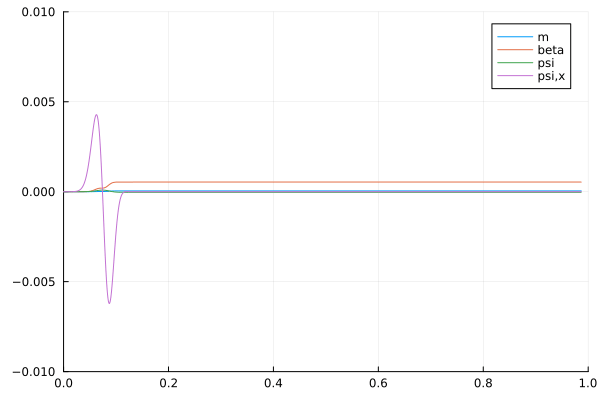

In [410]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 5000:100:6240
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], ylim=[-0.01, 0.01],xlim=[0.0, 1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.04926157287086606.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.04926157287086606.gif")
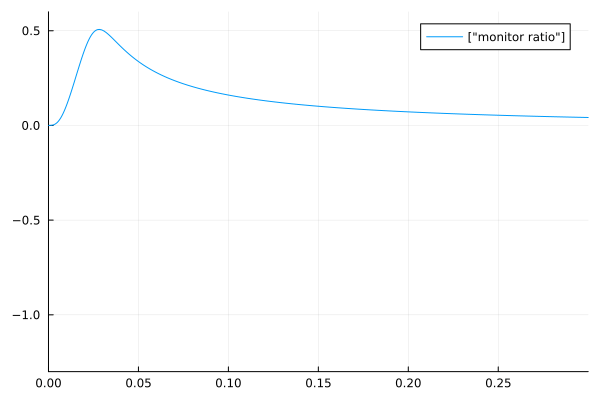

In [65]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

In [41]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/anim_res1.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/anim_res1.gif")
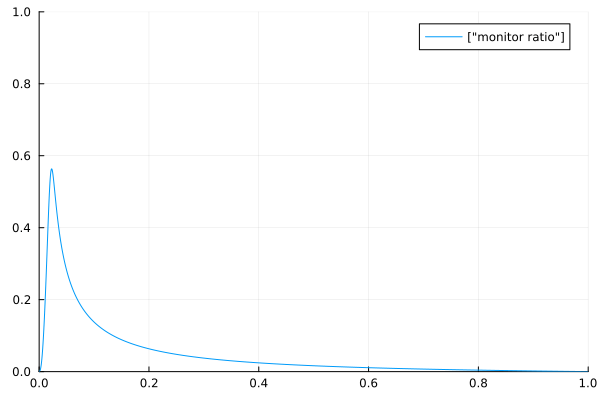

In [271]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8200:5:8430
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1],xlim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1500)

muninn animation

In [68]:
using Plots, CSV, DataFrames
import GR

lines = readlines(dir*"/res$res/data.txt")
grid=[]
m=[]
beta=[]
psi=[]
derpsi=[]

anim = @animate for n in 1:10
    
    for line in lines
        
    if occursin("Time", line)==true
        grid=[]
        m=[]
        beta=[]
        psi=[]
        derpsi=[]
    else
        a=split(line, " ")
        a=deleteat!(a, findall(x->x=="",a))
        if a!=[]
            grid=vcat(grid,parse(Float64,a[1]))
            m=vcat(m,parse(Float64,a[2]))
            beta=vcat(beta,parse(Float64,a[3]))
            psi=vcat(psi,parse(Float64,a[4]))
            derpsi=vcat(derpsi,parse(Float64,a[5]))

        end
    end



    #
    
    IJulia.clear_output(true)
    

    plot()
    
    
    plot!(grid[4:L-3], [m beta psi derpsi][4:L-3,:], labels=["m" "beta" "psi" "psi,x"], ylim=[-0.001, 0.001],xlim=[0.0, 1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1200)

LoadError: syntax: incomplete: "for" at In[68]:11 requires end

In [118]:
datagrid=Array{Float128}(undef, L)
datam=Array{Float128}(undef, L)
databeta=Array{Float128}(undef, L)
datapsi=Array{Float128}(undef, L)
dataderpsi=Array{Float128}(undef, L)

lines = readlines(dir*"/res$res/data.txt")

for line in lines
    if occursin("Time", line)==true
        plot(grid, m)
        
        
        grid=[]
        m=[]
        beta=[]
        psi=[]
        derpsi=[]
        
    else
        a=split(line, " ")
        a=deleteat!(a, findall(x->x=="",a))
        if a!=[]
            grid=vcat(grid,parse(Float64,a[1]))
            m=vcat(m,parse(Float64,a[2]))
            beta=vcat(beta,parse(Float64,a[3]))
            psi=vcat(psi,parse(Float64,a[4]))
            derpsi=vcat(derpsi,parse(Float64,a[5]))
        elseif a==[]
            #println(length(datagrid))
            #println(length(grid))
            #datagrid=cat(dims=2,datagrid, grid)
            datagrid=[datagrid; grid]
            datam=cat(dims=2,datam, m)
            databeta=cat(dims=2,databeta, beta)
            datapsi=cat(dims=2,datapsi, psi)
            dataderpsi=cat(dims=2,dataderpsi, derpsi)
        end
    end
    
end


In [119]:
datagrid

5796-element Vector{Any}:
    8.34319962899321883561303658422435691e-4956
    2.05206491026800433201677921073574507e-4936
 -nan
    8.34319963676342897893866671733368366e-4956
    1.53904868514964416335782103718351843e-4936
    2.77150719072578205953599890496588243e-4938
    1.19445898260724901253333516414690294e-4946
    1.53904868634410314596507031525083490e-4936
    2.77150776406609371101565222808974947e-4938
 -nan
    1.53904868753856212857231959331815136e-4936
    2.77150833740640536249530555121361651e-4938
    8.34319965554143682530893953901455664e-4956
    ⋮
    0.96
    0.965
    0.97
    0.975
    0.98
    0.985
    0.99
    0.995
    1.0
    1.005
    1.01
    1.015

In [117]:
A = Matrix{Int}(undef, 0, 2)  # 0x2 array of Int
B = rand(5, 2)
A = [A; B] 

5×2 Matrix{Float64}:
 0.12618    0.261235
 0.238235   0.840988
 0.200322   0.354143
 0.347195   0.854355
 0.0130686  0.727983

In [21]:
parse(Float64,"1")

1.0

In [47]:
dir*"/res$res/data.txt"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/data.txt"

In [ ]:
with open(dir) as f:
    for line in f:

        index = line.find("Time")
        if index==1:
            time.append(line[index+7:len(line)-1])
            auxgrid=[]
            auxm=[]
            auxbeta=[]
            auxpsi=[]
            auxderpsi=[]

        else:
                a=line.split()
                if a!=[]:
                    auxgrid.append(float(a[0]))
                    auxm.append(float(a[1]))
                    auxbeta.append(float(a[2]))
                    auxpsi.append(float(a[3]))
                    auxderpsi.append(float(a[4]))
                elif a==[]:
                    grid.append(auxgrid)
                    m.append(auxm)
                    beta.append(auxbeta)
                    psi.append(auxpsi)
                    derpsi.append(auxderpsi)
        datatime.append(time)
        datagrid.append(grid)
        datam.append(m)
        databeta.append(beta)
        datapsi.append(psi)
        dataderpsi.append(derpsi)

In [59]:
a=[ "ola tudo bem"]
split(a," ")

LoadError: MethodError: no method matching split(::Vector{String}, ::String)
[0mClosest candidates are:
[0m  split([91m::T[39m, ::Any; limit, keepempty) where T<:AbstractString at strings/util.jl:592

In [62]:
using DelimitedFiles

readdlm(dir*"/res$res/data.txt", ',',Int)

LoadError: unexpected character 'T' after quoted field at row 1 column 1

In [360]:
epsilon(dt,dx)

7.81250000000000000000000000000000000e-03

In [361]:
twod_epsilon(dt,dx)

3.12500000000000000000000000000000000e-02

In [363]:
epsilon(dt,dx)

7.81250000000000000000000000000000000e-03

In [147]:
twod_epsilon(dt,dx)

0.3125